In [ ]:
import pandas as pd
import io

from google.colab import files
data_to_load = files.upload()
    
df_master = pd.read_csv(io.BytesIO(data_to_load['dqlab_telco.csv']))

df = df_master.copy()

Saving dqlab_telco.csv to dqlab_telco (2).csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [ ]:
df.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7113.000000,7113.000000,7014.000000,7087.000000,7098.000000
mean,202005.999016,0.161816,32.749358,67.018985,2306.582650
std,0.031357,0.368308,25.206376,117.396646,2575.212013
min,202005.000000,0.000000,0.000000,0.000000,19.000000
25%,202006.000000,0.000000,9.000000,36.100000,402.925000
50%,202006.000000,0.000000,30.000000,70.450000,1400.700000
75%,202006.000000,0.000000,56.000000,89.900000,3801.600000
max,202006.000000,1.000000,500.000000,9000.000000,80000.000000


In [ ]:
#Step 1: Filtering customerID with character length 11-12 
#Part a: convert data type into string

df["customerID"] = df["customerID"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [ ]:
#Part b: filtering character length of the column customerID which has 11-12 character length

long = df[(df["customerID"].str.len() == 11) | (df["customerID"].str.len() == 12)]

#Part c: Check the length of row which has 11-12 range of character, also check the row amount of other column. If it has same amount of row as customerID then it has filtered well
long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7013 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7013 non-null   int64  
 1   customerID        7013 non-null   object 
 2   gender            7013 non-null   object 
 3   SeniorCitizen     7013 non-null   int64  
 4   Partner           7013 non-null   object 
 5   Dependents        7013 non-null   object 
 6   tenure            6914 non-null   float64
 7   PhoneService      7013 non-null   object 
 8   MultipleLines     7013 non-null   object 
 9   InternetService   7013 non-null   object 
 10  OnlineSecurity    7013 non-null   object 
 11  OnlineBackup      7013 non-null   object 
 12  DeviceProtection  7013 non-null   object 
 13  TechSupport       7013 non-null   object 
 14  StreamingTV       7013 non-null   object 
 15  StreamingMovies   7013 non-null   object 
 16  Contract          7013 non-null   object 


In [ ]:
#Step 2: Filtering data with value number only

number=long[long["customerID"].str.isnumeric()]
number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7006 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7006 non-null   int64  
 1   customerID        7006 non-null   object 
 2   gender            7006 non-null   object 
 3   SeniorCitizen     7006 non-null   int64  
 4   Partner           7006 non-null   object 
 5   Dependents        7006 non-null   object 
 6   tenure            6907 non-null   float64
 7   PhoneService      7006 non-null   object 
 8   MultipleLines     7006 non-null   object 
 9   InternetService   7006 non-null   object 
 10  OnlineSecurity    7006 non-null   object 
 11  OnlineBackup      7006 non-null   object 
 12  DeviceProtection  7006 non-null   object 
 13  TechSupport       7006 non-null   object 
 14  StreamingTV       7006 non-null   object 
 15  StreamingMovies   7006 non-null   object 
 16  Contract          7006 non-null   object 


In [ ]:
#Step 3: Filtering "customerID" with the two first number is 45

first45 = number[number["customerID"].str[:2] == "45"]

#Langkah 4: Dropping duplicate ID and sorting it out
df_load = first45.drop_duplicates(subset="customerID")
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6993 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6993 non-null   int64  
 1   customerID        6993 non-null   object 
 2   gender            6993 non-null   object 
 3   SeniorCitizen     6993 non-null   int64  
 4   Partner           6993 non-null   object 
 5   Dependents        6993 non-null   object 
 6   tenure            6894 non-null   float64
 7   PhoneService      6993 non-null   object 
 8   MultipleLines     6993 non-null   object 
 9   InternetService   6993 non-null   object 
 10  OnlineSecurity    6993 non-null   object 
 11  OnlineBackup      6993 non-null   object 
 12  DeviceProtection  6993 non-null   object 
 13  TechSupport       6993 non-null   object 
 14  StreamingTV       6993 non-null   object 
 15  StreamingMovies   6993 non-null   object 
 16  Contract          6993 non-null   object 


In [ ]:
#Step 5: Checking how many the missing values are
df_load.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

In [ ]:
#Step 6: Fixing missing value

df_load["tenure"].fillna("11", inplace = True) 
df_load["MonthlyCharges"].fillna(value=df['MonthlyCharges'].median(), inplace = True) 
df_load["TotalCharges"].fillna(value=df['TotalCharges'].median(), inplace = True)

df_load.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn               43
dtype: int64

In [ ]:
df_load.groupby('Churn')['customerID'].nunique()

Churn
Churn       9
No       5114
Yes      1827
Name: customerID, dtype: int64

In [ ]:
#Fill the N/A of column Churn with the least of the data, which is 'Churn'
df_load["Churn"].fillna("Yes", inplace = True)
df_load["Churn"] = df_load["Churn"].replace(['Churn'],'Yes')

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_load.groupby('gender')['customerID'].nunique()

gender
Female       3452
Laki-Laki       6
Male         3521
Wanita         14
Name: customerID, dtype: int64

In [ ]:
#Step 7: Eliminate categories with similar meaning

df_load = df_load.replace(['Laki-Laki'],'Male')
df_load = df_load.replace(['Wanita'],'Female')
df_load["Dependents"] = df_load["Dependents"].replace(['Iya'],'Yes')

In [ ]:
df_load.groupby('gender')['customerID'].nunique()

gender
Female    3466
Male      3527
Name: customerID, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [ ]:
#Step 8: Finding outlier by visualizing the data using boxplot

#Part a: Changing data type to int or float
df_load["tenure"] = df_load["tenure"].astype(float)
df_load["tenure"].dtypes

dtype('float64')

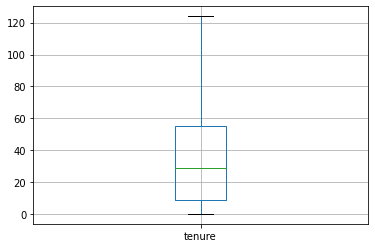

In [ ]:
#Part b: Starting to visualize the numerical data

df_box = pd.DataFrame(df_load, columns = ['tenure'])
df_box[['tenure']].boxplot()

In [ ]:
#Checking description as consideration for the next step
df_load["tenure"].describe()

count    6993.000000
mean       32.494351
std        25.176534
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max       500.000000
Name: tenure, dtype: float64

In [ ]:
#Changing value of the outlier using IQR
Q1 = (df_load[['tenure']]).quantile(0.25)
Q3 = (df_load[['tenure']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('The maximum value of each variables: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nThe maximum value of each variables: ')
print(minimum)

The maximum value of each variables: 
tenure    124.0
dtype: float64

The maximum value of each variables: 
tenure   -60.0
dtype: float64


In [ ]:
#Implementing constraints and replacing the values
more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

In [ ]:
#Changing value of the outlier using IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('The maximum value of each variables: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nThe maximum value of each variables: ')
print(minimum)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

The maximum value of each variables: 
tenure             124.00
MonthlyCharges     167.25
TotalCharges      8891.50
dtype: float64

The maximum value of each variables: 
tenure             -60.00
MonthlyCharges     -39.15
TotalCharges     -4681.30
dtype: float64


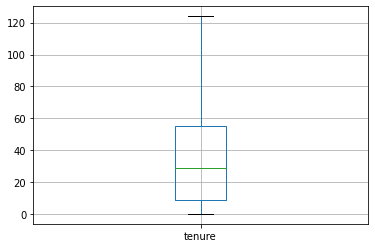

In [ ]:
df_box = pd.DataFrame(df_load, columns = ['tenure'])
df_box[['tenure']].boxplot()

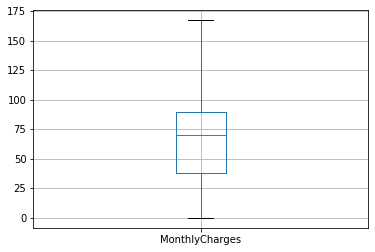

In [ ]:
df_box = pd.DataFrame(df_load, columns = ['MonthlyCharges'])
df_box[['MonthlyCharges']].boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x7fdc3e6189b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdc3e5a6400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc3e5a6e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc3e5a6b00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdc3e618cc0>,
  <matplotlib.lines.Line2D at 0x7fdc3e5a6080>]}

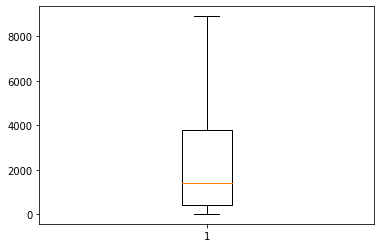

In [ ]:
plt.boxplot(df_load.TotalCharges)

In [ ]:
#Final checking missing value

df_load.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_load.to_csv('dqlab_telco_clean.csv', encoding='utf-8', index=False)
files.download('dqlab_telco_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>